# Which circuits produce the best races? 

<font size = 5> By Robyn Jin

## Introduction

<font size = "3">

The Formula One World Championship, also known as F1, is the most popular single-seat auto racing competition, with each season being comprised of a series of races called Grands Prix. It is held by the Fédération Internationale de l'Automobile (FIA) and owned by the Formula One Group. The competition first took place is 1950 and has since become the most well-known form of racing. The term "formula" refers to a set of rules that all cars must adhere to. The races take place in many countries all over the world on various circuits or closed roads built specifically for racing. The point system used at Grands Prix determines two annual championships, one for the individual drivers, and one for the constructors, or the teams. The objective of this project is to determine the relationship between the results of the race and the circuit at which the race is held. 

We are interested in this question because studying various aspects of each race may reveal which circuits are more competitive and which are more entertaining to watch. This analysis may provide information to spectators when determining which races to watch. 

This project uses four different datasets, `results`, `circuits`, `races`, and `lap_times`. By 

## Data Importation

<font size = "3">

The libraries below have been imported in order to analyze the data. `numpy` will be used for computations, `pandas` will be used for data manipulation, `matplotlib.pyplot` will be used to create visualizations, and `seaborn` will be used to graph categorical data. 

In [1]:
# import packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [56]:
# import datasets

results_raw = pd.read_csv("data_raw/results.csv")
circuits_raw = pd.read_csv("data_raw/circuits.csv")
races_raw = pd.read_csv("data_raw/races.csv")
lap_times_raw = pd.read_csv("data_raw/lap_times.csv")


In [57]:
# rename columns

circuits_rename = {"name":"circuit_name"}
circuits = circuits_raw.rename(columns = circuits_rename)

results_rename = {"time":"results_time", "milliseconds":"results_milliseconds"}
results = results_raw.rename(columns = results_rename)

lap_time_rename = {"time":"lap_time", "milliseconds":"lap_time_milliseconds"}
lap_times = lap_times_raw.rename(columns = lap_time_rename)


In [58]:
# merge datasets

circuits_races_merge = pd.merge(circuits[['circuitId', 'circuit_name']],
                                races_raw[['raceId', 'circuitId', 'year']],
                                on = "circuitId",
                                how = "left")

circuits_races_merge

circuits_races_results_merge = pd.merge(circuits_races_merge,
                                        results[['raceId', 'constructorId', 'results_milliseconds', 'points', 'fastestLapSpeed']],
                                        on = "raceId",
                                        how = "left")

circuits_races_results_merge

formula1_merge = pd.merge(circuits_races_results_merge,
                          lap_times[['raceId', 'lap_time_milliseconds']],
                          on = "raceId",
                          how = "left")

formula1_merge


,circuitId,circuit_name,raceId,year,constructorId,results_milliseconds,points,fastestLapSpeed,lap_time_milliseconds
0,1,Albert Park Grand Prix Circuit,1,2009,23.0,5655784,10.0,216.891,109088.0
1,1,Albert Park Grand Prix Circuit,1,2009,23.0,5655784,10.0,216.891,93740.0
2,1,Albert Park Grand Prix Circuit,1,2009,23.0,5655784,10.0,216.891,91600.0
3,1,Albert Park Grand Prix Circuit,1,2009,23.0,5655784,10.0,216.891,91067.0
4,1,Albert Park Grand Prix Circuit,1,2009,23.0,5655784,10.0,216.891,92129.0
...,...,...,...,...,...,...,...,...,...
11479420,79,Miami International Autodrome,1078,2022,51.0,\N,0.0,203.520,94298.0
11479421,79,Miami International Autodrome,1078,2022,51.0,\N,0.0,203.520,94217.0
11479422,79,Miami International Autodrome,1078,2022,51.0,\N,0.0,203.520,93631.0
11479423,79,Miami International Autodrome,1078,2022,51.0,\N,0.0,203.520,119970.0


In [59]:
# clean the data (get rid of NaN)

formula1_merge.dtypes

formula1_merge["results_milliseconds"].str.isnumeric()
formula1_merge["fastestLapSpeed"].str.isnumeric()

subset_results = formula1_merge.query("results_milliseconds.str.isnumeric() == False") # tells us which rows have values that are not numeric
list_unique_results_millseconds = pd.unique(subset_results["results_milliseconds"])
#print(list_unique_results_millseconds) # tells us what these non-numeric values are

list_old_results = ['\\N']
list_new_results = [np.nan]
formula1_merge["results_milliseconds"] = formula1_merge['results_milliseconds'].replace(list_old_results, list_new_results)
formula1_merge["results_milliseconds_numeric"] = pd.to_numeric(formula1_merge["results_milliseconds"])

subset_speed = formula1_merge.query("fastestLapSpeed.str.isnumeric() == False") # tells us which rows have values that are not numeric
list_unique_speed = pd.unique(subset_speed["fastestLapSpeed"])
print(list_unique_speed) # tells us what these non-numeric values are

list_old_results = ['\\N']
list_new_results = [np.nan]
formula1_merge["fastestLapSpeed"] = formula1_merge['fastestLapSpeed'].replace(list_old_results, list_new_results)
formula1_merge["fastestLapSpeed_numeric"] = pd.to_numeric(formula1_merge["fastestLapSpeed"])
display(formula1_merge)

formula1_clean = formula1_merge.dropna()
formula1_clean


['216.891' '214.344' '214.706' ... '208.351' '208.423' '203.520']


,circuitId,circuit_name,raceId,year,constructorId,results_milliseconds,points,fastestLapSpeed,lap_time_milliseconds,results_milliseconds_numeric,fastestLapSpeed_numeric
0,1,Albert Park Grand Prix Circuit,1,2009,23.0,5655784,10.0,216.891,109088.0,5655784.0,216.891
1,1,Albert Park Grand Prix Circuit,1,2009,23.0,5655784,10.0,216.891,93740.0,5655784.0,216.891
2,1,Albert Park Grand Prix Circuit,1,2009,23.0,5655784,10.0,216.891,91600.0,5655784.0,216.891
3,1,Albert Park Grand Prix Circuit,1,2009,23.0,5655784,10.0,216.891,91067.0,5655784.0,216.891
4,1,Albert Park Grand Prix Circuit,1,2009,23.0,5655784,10.0,216.891,92129.0,5655784.0,216.891
...,...,...,...,...,...,...,...,...,...,...,...
11479420,79,Miami International Autodrome,1078,2022,51.0,NaN,0.0,203.520,94298.0,NaN,203.520
11479421,79,Miami International Autodrome,1078,2022,51.0,NaN,0.0,203.520,94217.0,NaN,203.520
11479422,79,Miami International Autodrome,1078,2022,51.0,NaN,0.0,203.520,93631.0,NaN,203.520
11479423,79,Miami International Autodrome,1078,2022,51.0,NaN,0.0,203.520,119970.0,NaN,203.520


,circuitId,circuit_name,raceId,year,constructorId,results_milliseconds,points,fastestLapSpeed,lap_time_milliseconds,results_milliseconds_numeric,fastestLapSpeed_numeric
0,1,Albert Park Grand Prix Circuit,1,2009,23.0,5655784,10.0,216.891,109088.0,5655784.0,216.891
1,1,Albert Park Grand Prix Circuit,1,2009,23.0,5655784,10.0,216.891,93740.0,5655784.0,216.891
2,1,Albert Park Grand Prix Circuit,1,2009,23.0,5655784,10.0,216.891,91600.0,5655784.0,216.891
3,1,Albert Park Grand Prix Circuit,1,2009,23.0,5655784,10.0,216.891,91067.0,5655784.0,216.891
4,1,Albert Park Grand Prix Circuit,1,2009,23.0,5655784,10.0,216.891,92129.0,5655784.0,216.891
...,...,...,...,...,...,...,...,...,...,...,...
11474144,79,Miami International Autodrome,1078,2022,210.0,5737563,0.0,210.565,93479.0,5737563.0,210.565
11474145,79,Miami International Autodrome,1078,2022,210.0,5737563,0.0,210.565,94298.0,5737563.0,210.565
11474146,79,Miami International Autodrome,1078,2022,210.0,5737563,0.0,210.565,94217.0,5737563.0,210.565
11474147,79,Miami International Autodrome,1078,2022,210.0,5737563,0.0,210.565,93631.0,5737563.0,210.565


In [ ]:
# drop circuits that have zero points



In [60]:
# groupby and aggregate stufffff (to reduce the dataset that we're working with)
# only look at the most competitive circuits in terms of mean_points (best indicator)

formula1_agg = (formula1_clean.groupby("circuit_name")
                .agg(mean_result_time = ('results_milliseconds_numeric','mean'),
                     mean_lap_speed = ('fastestLapSpeed_numeric','mean'),
                     mean_points = ('points','mean'),
                     sum_points = ('points','sum'),
                     count_obs = ('points',len)).reset_index())

formula1_agg


,circuit_name,mean_result_time,mean_lap_speed,mean_points,sum_points,count_obs
0,Albert Park Grand Prix Circuit,5.533178e+06,216.224711,8.157312,1261463.0,154642
1,Autodromo Enzo e Dino Ferrari,5.791556e+06,219.457773,6.337449,468160.0,73872
2,Autodromo Internazionale del Mugello,8.395242e+06,233.737917,8.500000,79356.0,9336
3,Autodromo Nazionale di Monza,4.864689e+06,243.582811,7.137027,1517175.0,212578
4,Autódromo Hermanos Rodríguez,6.010452e+06,190.691997,11.917476,808422.0,67835
5,Autódromo Internacional do Algarve,5.638302e+06,207.217283,11.591421,218336.0,18836
6,Autódromo José Carlos Pace,6.121984e+06,206.773402,8.507669,1818157.0,213708
7,Bahrain International Circuit,5.880548e+06,205.367027,7.099346,1647531.0,232068
8,Baku City Circuit,6.576169e+06,203.320349,8.566194,553359.0,64598
9,Buddh International Circuit,5.512861e+06,207.954128,8.860483,370953.0,41866


c:\Users\CatRo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


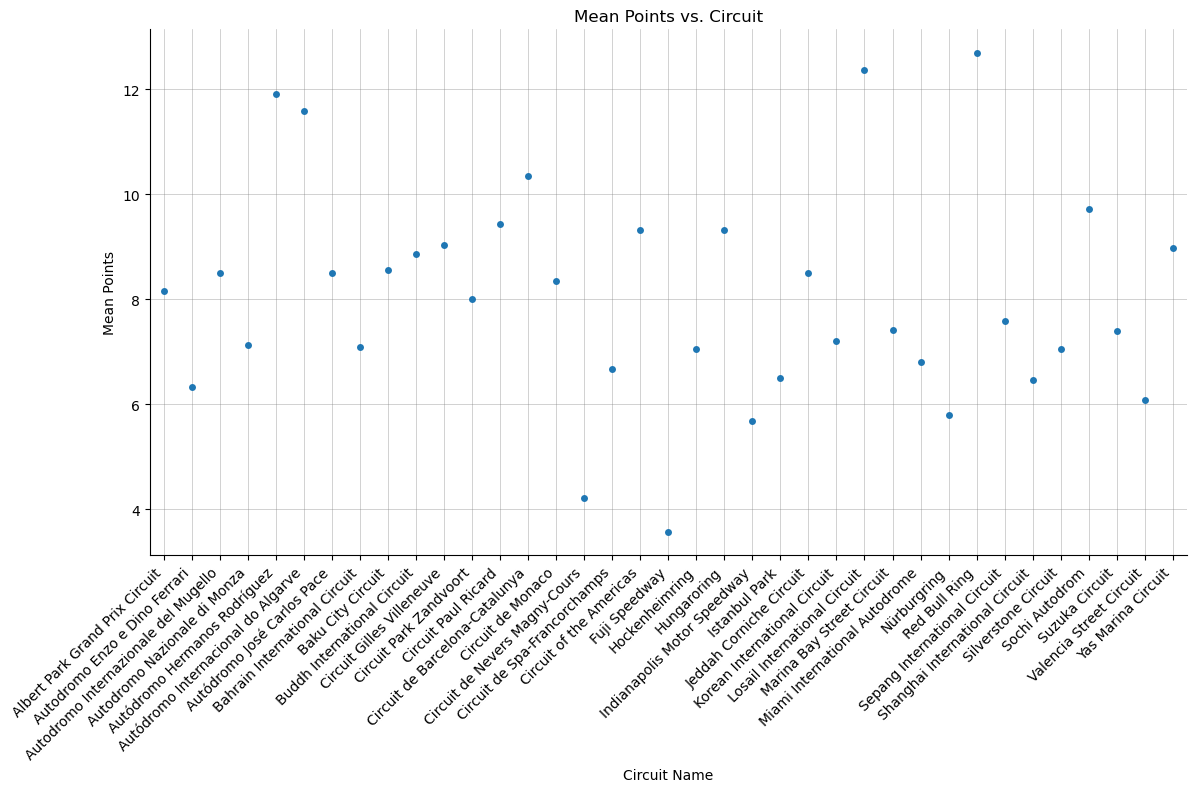

In [61]:
# we're interested in results, so we will look at mean_result_time, mean_points, and fastestLapSpeed

# plot data for mean_points

mean_point_plot = sns.catplot(data = formula1_agg, x = "circuit_name", y = "mean_points", 
                              height = 6, aspect = 2)
plt.grid(color='grey', linestyle='-', linewidth=0.5, alpha=0.5)
mean_point_plot.set_xticklabels(rotation=45, ha='right')

plt.title("Mean Points vs. Circuit")
plt.xlabel("Circuit Name")
plt.ylabel("Mean Points")
plt.show()


c:\Users\CatRo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


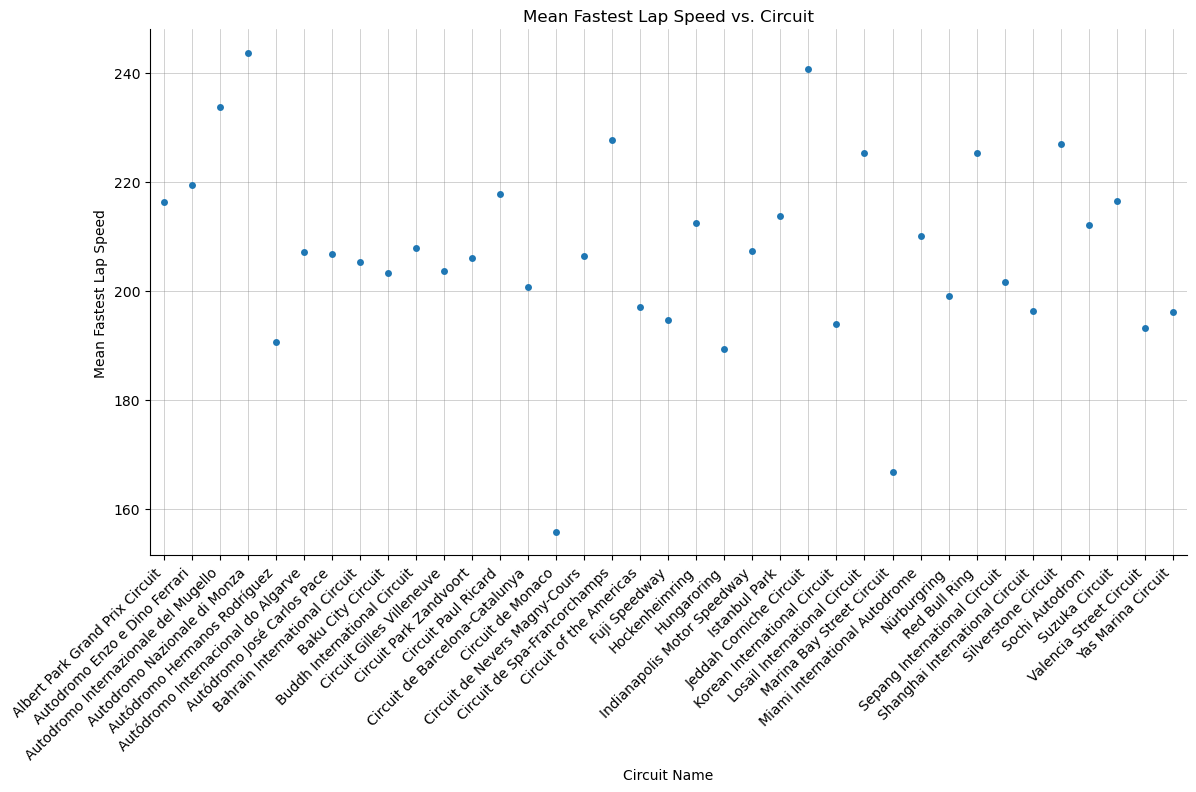

In [62]:
# plot data for mean_lap_speed

fastestLapSpeed_plot = sns.catplot(data = formula1_agg, x = "circuit_name", y = "mean_lap_speed", 
                                   height = 6, aspect = 2)
plt.grid(color='grey', linestyle='-', linewidth=0.5, alpha=0.5)
fastestLapSpeed_plot.set_xticklabels(rotation=45, ha='right')

plt.title("Mean Fastest Lap Speed vs. Circuit")
plt.xlabel("Circuit Name")
plt.ylabel("Mean Fastest Lap Speed")
plt.show()


c:\Users\CatRo\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


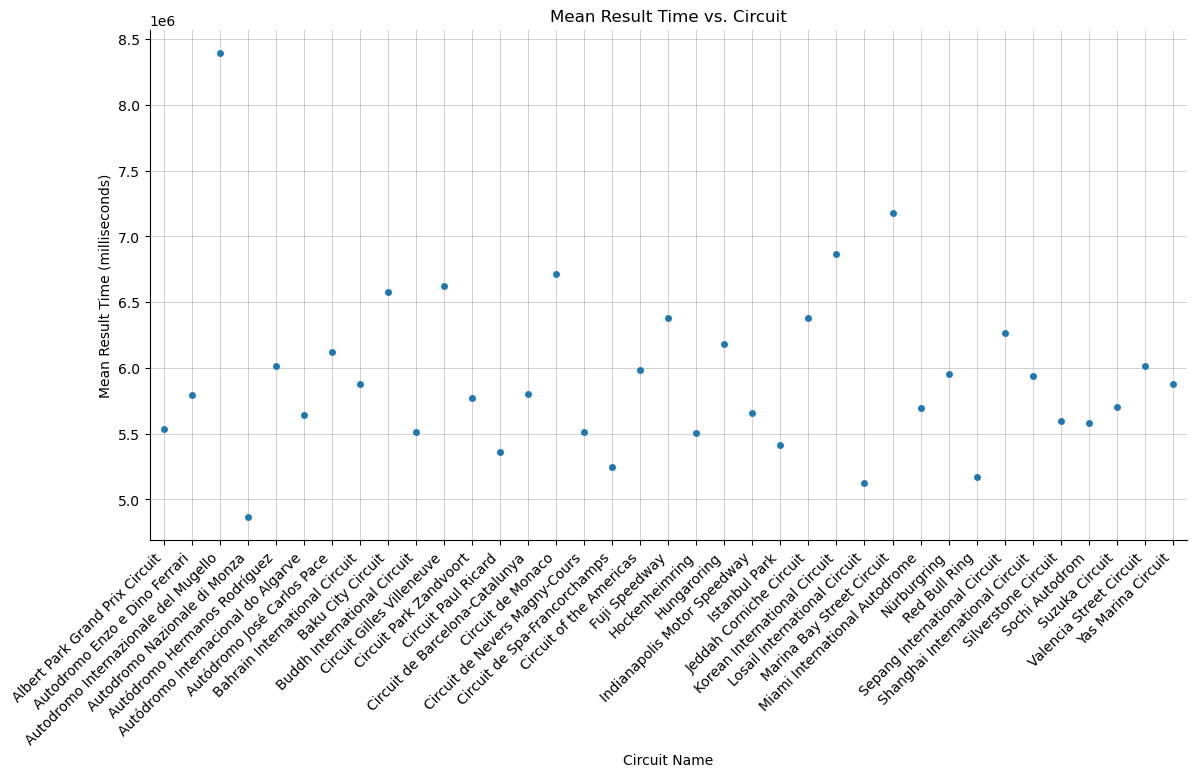

In [63]:
# plot data for mean_result_times

mean_result_time_plot = sns.catplot(data = formula1_agg, x = "circuit_name", y = "mean_result_time", 
                                    height = 6, aspect = 2)
plt.grid(color='grey', linestyle='-', linewidth=0.5, alpha=0.5)
mean_result_time_plot.set_xticklabels(rotation=45, ha='right')

plt.title("Mean Result Time vs. Circuit")
plt.xlabel("Circuit Name")
plt.ylabel("Mean Result Time (milliseconds)")
plt.show()


In [ ]:
# autodromo internazionale del mugello may show fastest result time because it is newer (doesn't
# have as many races as the other circuits)

# fastest races (result time) vs. most entertaining races (fastest lap speed) vs. number of points

# may want to study this data over time rather than an average over the history of the circuit, to
# predict future winners
